Laboratorio 4
Se tiene la siguiente ecuación:
$$
s =  \sum_{n=1}^{N} \frac{1}{n^{3}+3n+1}a^b
$$


La cual es una sumatoria en donde N∈N, a y b∈ R. Además, se sabe que N es un número que como máximo debe ser 4 294 967 29 y que tanto a como b no requieren mucha resolución.

Se le pide realizar un análisis comparativo entre funciones en Python y C. El programa en C debe incluir lo siguiente:

a) (1.0 punto) Una función que reciba como argumento de entrada el valor de N, a y b como argumentos de entrada y retorne el valor de s como salida. Para esta función usar la función pow para el cálculo del denominador y para el cálculo de a^b.


In [16]:
! rm *.c *.so 

In [17]:
%%file funcionSumatoria.c

#include <math.h>

double calcular_sumatoria(int N, double a, double b){

    double suma, numerador, denominador;
    
    int n;

    numerador = pow(a, b);

    suma = 0;

    for (int n=1; n<=N; n++){
        
        denominador = pow((double)n,3.0)+ 3*n + 1;
        suma = suma + numerador/denominador;

    }

    return suma;
}


Writing funcionSumatoria.c


In [18]:
!gcc -shared -o funcionSumatoria.so funcionSumatoria.c -lm

b) (1.0 punto) Una función que reciba como argumento de entrada el valor de N, a y b como argumentos de entrada y retorne el valor de s como salida. Para esta función solo usar la función pow para el cálculo de a^b.

In [19]:
%%file funcionSumatoria2.c

#include <math.h>

double calcular_sumatoria2(int N, double a, double b){

    double suma2, numerador2, denominador2;
    
    int n2;

    numerador2 = pow(a, b);

    suma2 = 0;

    for (int n2=1; n2<=N; n2++){

        double n2d = (double)n2;
        
        denominador2 = (n2d*n2d*n2d)+ 3.0*n2d + 1;
        suma2 = suma2 + numerador2/denominador2;

    }

    return suma2;
}


Writing funcionSumatoria2.c


In [20]:
!gcc -shared -o funcionSumatoria2.so funcionSumatoria2.c -lm

Un programa principal en Python donde se debe incluir:

c) (1.0 punto) Una función que reciba como argumento de entrada el valor de N, a y b como argumentos de entrada y retorne el valor de s como salida. Para esta función usar la función pow para el cálculo del denominador y para el cálculo de a^b.


In [21]:
import math

def sumatoria(N, a, b):

    suma=0

    numerador = pow(a,b)
    
    for n in range (1,N+1):
        denominador = pow(n,3) + (3*n) +1
        suma = suma+ (numerador/denominador)
    return suma


d) (1.0 punto) Una función que reciba como argumento de entrada el valor de N, a y b como argumentos de entrada y retorne el valor de s como salida. Para esta función solo usar la función pow para el cálculo de a^b.


In [22]:
import math

def sumatoria2(N, a, b):

    suma2=0

    numerador2= pow(a,b)
    
    for n2 in range (1, N+1):
        denominador2= (n2*n2*n2)+ (3*n2) +1
        suma2 = suma2 + (numerador2/denominador2)
    return suma2


e) (2.0 punto) El llamado a la librería generada en C y los respectivos argumentos de entrada y de salida. Además, en comentarios, debe justificar los tipos de datos utilizados.

In [23]:
import ctypes


#llamaremos a las dos funciones en c creadas

sumatoria1C= ctypes.CDLL('./funcionSumatoria.so')
    
#los tipos de datos utilizados son int para N y double para a y b, esto ya que N pertenee al conjunto de los naturales, mientras que a y b pertenecen al conjunto de los reales, por lo que es prefereible usar double, de esta forma no habrían errores
sumatoria1C.calcular_sumatoria.argtypes= [ctypes.c_int, ctypes.c_double, ctypes.c_double]
sumatoria1C.calcular_sumatoria.restype= ctypes.c_double

sumatoria2C= ctypes.CDLL('./funcionSumatoria2.so')

sumatoria2C.calcular_sumatoria2.argtypes= [ctypes.c_int, ctypes.c_double, ctypes.c_double]
sumatoria2C.calcular_sumatoria2.restype= ctypes.c_double




f) (2.0 puntos) Validar que las 4 funciones dan los mismos resultados para los valores 1000, 3.5 y -0.25 para N,a y b, respectivamente.


In [24]:

resultado1C= sumatoria1C.calcular_sumatoria(1000, 3.5, -0.25)

resultado2C= sumatoria2C.calcular_sumatoria2(1000, 3.5, -0.25)

resultado1P= sumatoria(1000, 3.5, -0.25)

resultado2P= sumatoria2(1000, 3.5, -0.25)



In [25]:
resultado1C

0.24081597314253553

In [26]:
resultado2C

0.24081597314253553

In [27]:
resultado1P

0.24081597314253553

In [28]:
resultado2P

0.24081597314253553

g) (2.0 puntos) Realizar un análisis temporal de las 4 funciones considerando los datos del inciso f). Considerar graficar los tiempos para un valor de 50 iteraciones. Realizar comentarios acerca del resultado.

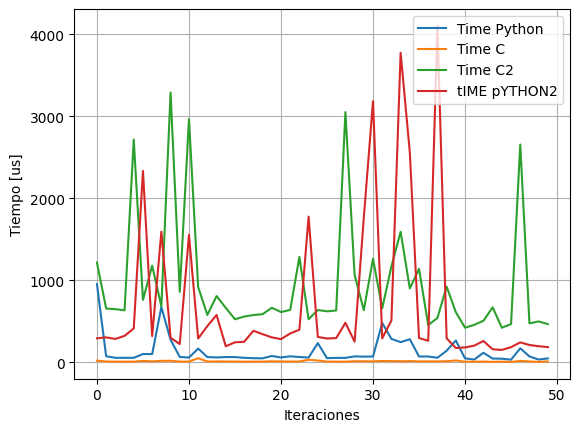

In [15]:
import numpy as np
import time
import statistics
import matplotlib.pyplot as plt
import ctypes

import math

def sumatoria(N, a, b):

    suma=0

    numerador = pow(a,b)
    
    for n in range (1,N+1):
        denominador = pow(n,3) + (3*n) +1
        suma = suma+ (numerador/denominador)
    return suma

def sumatoria2(N, a, b):

    suma2=0

    numerador2= pow(a,b)
    
    for n2 in range (1, N+1):
        denominador2= (n2*n2*n2)+ (3*n2) +1
        suma2 = suma2 + (numerador2/denominador2)
    return suma2


#llamaremos a las dos funciones en c creadas

sumatoria1C= ctypes.CDLL('./funcionSumatoria.so')
    
#los tipos de datos utilizados son int para N y double para a y b, esto ya que N pertenee al conjunto de los naturales, mientras que a y b pertenecen al conjunto de los reales, por lo que es prefereible usar double, de esta forma no habrían errores
sumatoria1C.calcular_sumatoria.argtypes= [ctypes.c_int, ctypes.c_double, ctypes.c_double]
sumatoria1C.calcular_sumatoria.restype= ctypes.c_double

sumatoria2C= ctypes.CDLL('./funcionSumatoria2.so')

sumatoria2C.calcular_sumatoria2.argtypes= [ctypes.c_int, ctypes.c_double, ctypes.c_double]
sumatoria2C.calcular_sumatoria2.restype= ctypes.c_double

iteraciones= 50

time_c1= []
time_c2= []
time_p1= []
time_p2= []

for _ in range (iteraciones):
    tic1= time.perf_counter()
    sumatoria1C.calcular_sumatoria(1000, 3.5, -0.25)
    toc1= time.perf_counter()

    time_c1.append(1e6*(toc1-tic1))

    tic2= time.perf_counter()
    sumatoria2C.calcular_sumatoria2(1000, 3.5, -0.25)
    toc2= time.perf_counter()

    time_c2.append(1e6*(toc2-tic2))

    tic3= time.perf_counter()
    sumatoria(1000, 3.5, -0.25)
    toc3= time.perf_counter()

    time_p1.append(1e6*(toc3-tic3))

    tic4= time.perf_counter()
    sumatoria2(1000, 3.5, -0.25)
    toc4= time.perf_counter()

    time_p2.append(1e6*(toc4-tic4))

plt.plot(time_c1)
plt.plot(time_c2)
plt.plot(time_p1)
plt.plot(time_p2)
plt.grid()
plt.legend(["Time Python", "Time C", "Time C2", "tIME pYTHON2"])
plt.xlabel("Iteraciones")
plt.ylabel("Tiempo [us]")
plt.savefig("Sumatoria_lab4.png")
plt.show()
plt.close()



h) (2.0 puntos) Realizar un análisis temporal de las 4 funciones considerando N=1024,2048,4096,8192,16384,32768. Considerar 50 iteraciones para cada N. Graficar el resultado y brindar comentarios acerca del resultado.


i) (3.0 puntos) Calcular y graficar el SpeedUP para los mismos rangos de N del inciso anterior. Considerar que el SpeedUP debe ser entre las funciones análogas entre las funciones en C y Python. Realizar comentarios acerca de sus resultados